## 1. Finding null value in the dataset

               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.

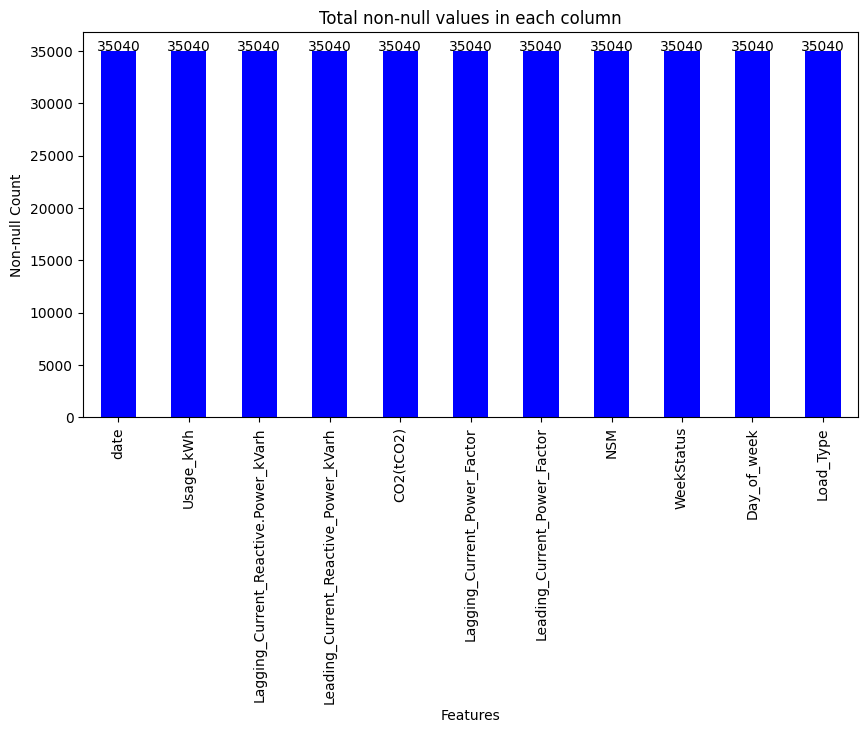

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv("C:\\Users\\ADMIN\\Dropbox\\PC\\Desktop\\NCKH\\Steel_industry_data.xls")
print(df.head())

df.info()

# Check for missing values
null_counts = df.notnull().sum()

# Visualize missing values as a bar chart
plt.figure(figsize=(10, 5))
bars = null_counts.plot(kind="bar", color="blue")
plt.title("Total non-null values in each column")
plt.xlabel("Features")
plt.ylabel("Non-null Count")

# Add value labels on top of each bar
for index, value in enumerate(null_counts):
    plt.text(index, value + 5, str(value), ha='center')

plt.show()


## 2. Correlation Analysis

##### Encode the dataset

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def encode_categorical(df, nominal_columns, ordinal_columns):
    df_encoded = df.copy()

    # Encode the Load_Type column into 3 binary columns
    if 'Load_Type' in ordinal_columns:
        onehot = OneHotEncoder(sparse_output=False, drop=None)
        encoded_cols = onehot.fit_transform(df_encoded[['Load_Type']])
        encoded_col_names = [f"Load_Type_{category}" for category in onehot.categories_[0]]
        encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names, index=df_encoded.index)
        df_encoded = pd.concat([df_encoded.drop(columns=['Load_Type']), encoded_df], axis=1)

    # Encode nominal columns
    df_encoded = pd.get_dummies(df_encoded, columns=nominal_columns, drop_first=True)

    # Change all boolean columns to 0/1
    for col in df_encoded.select_dtypes(include=['bool']).columns:
        df_encoded[col] = df_encoded[col].astype(int)

    return df_encoded


# Define nominal and ordinal columns
nominal_columns = ['WeekStatus', 'Day_of_week']
ordinal_columns = ['Load_Type']

# Encode the data
df_encoded = encode_categorical(df, nominal_columns, ordinal_columns)

# Check the result
print(df_encoded.head())

               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.

##### Pearson Correlation

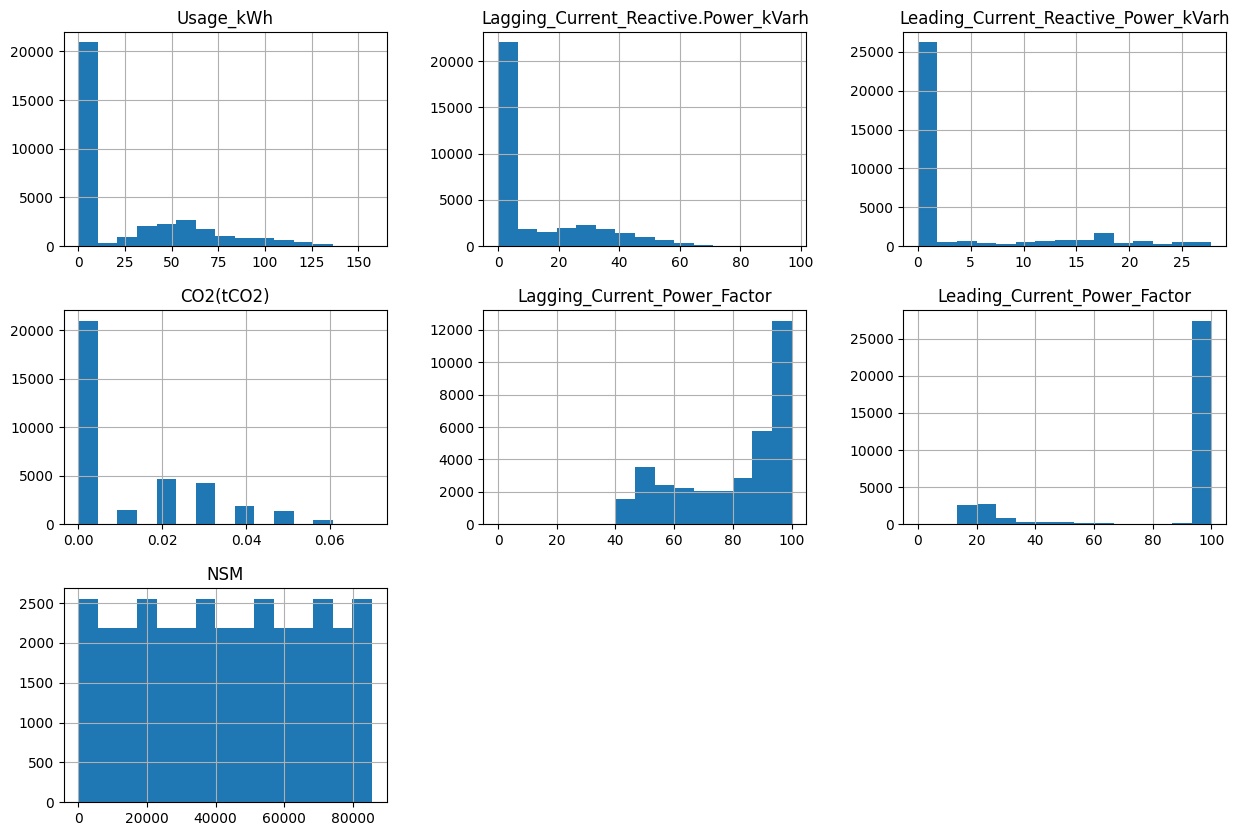

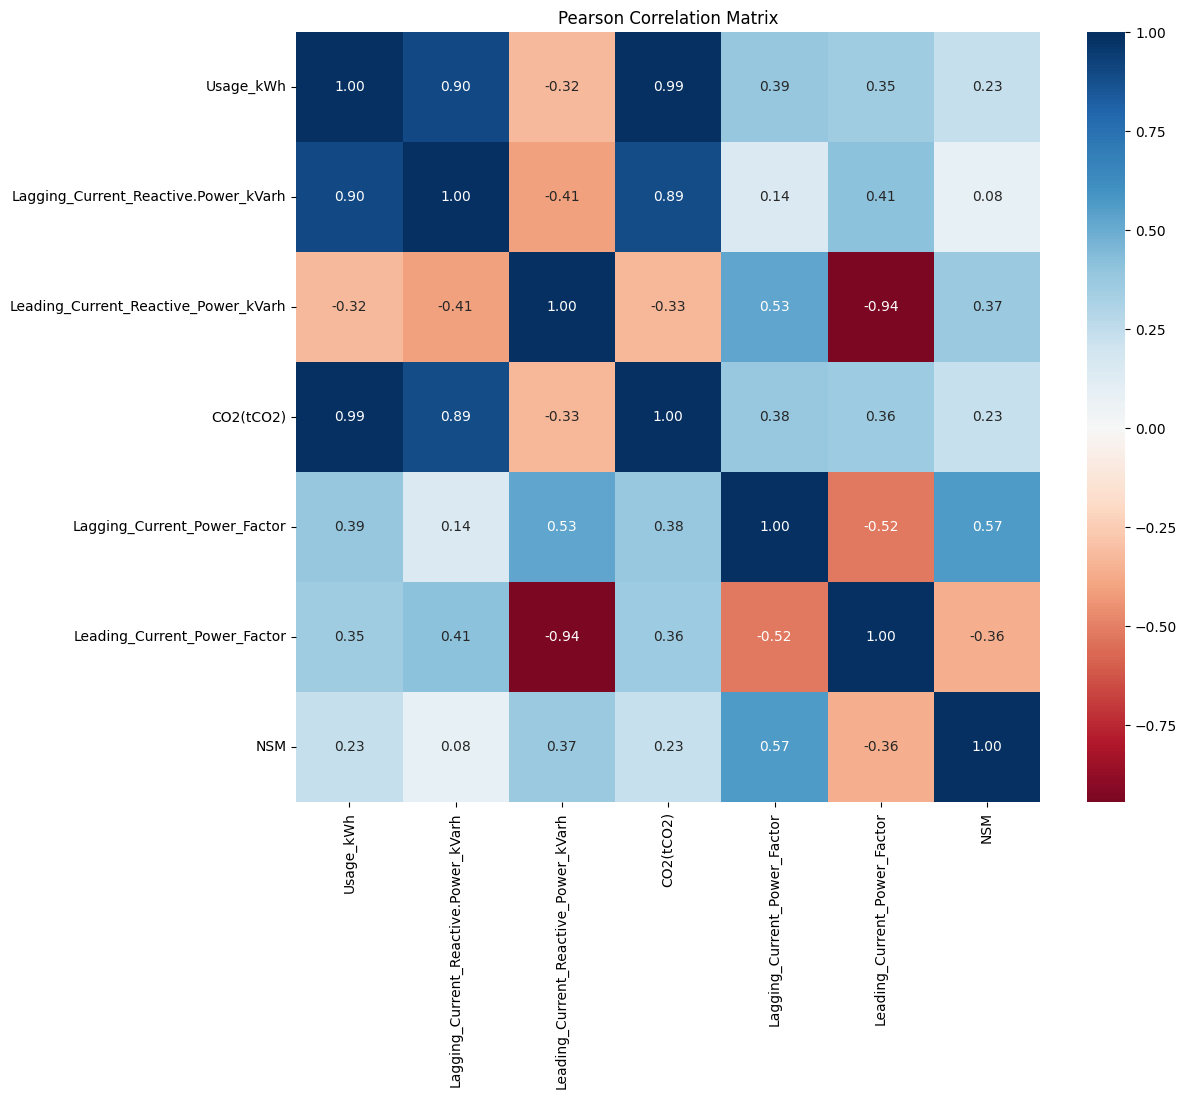

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_vars = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 
                   'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

# distribution of continuous variables
hist = df[continuous_vars].hist(bins=15, figsize=(15, 10), layout=(3, 3))

# Calculate the Pearson correlation matrix
corr_matrix = df[continuous_vars].corr(method='pearson')

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", center=0)
plt.title("Pearson Correlation Matrix")
plt.show()

## 3. Fit the model

LinearRegression:
  MSE = 17.8107
  MAE = 2.5969
  R2 = 0.9843
  Time = 0.0104 seconds

Ridge:
  MSE = 17.8134
  MAE = 2.5975
  R2 = 0.9843
  Time = 0.0058 seconds

Lasso:
  MSE = 19.2049
  MAE = 2.7970
  R2 = 0.9831
  Time = 0.0412 seconds

KNN:
  MSE = 27.1572
  MAE = 2.6516
  R2 = 0.9761
  Time = 0.0028 seconds


Chart for the model: LinearRegression


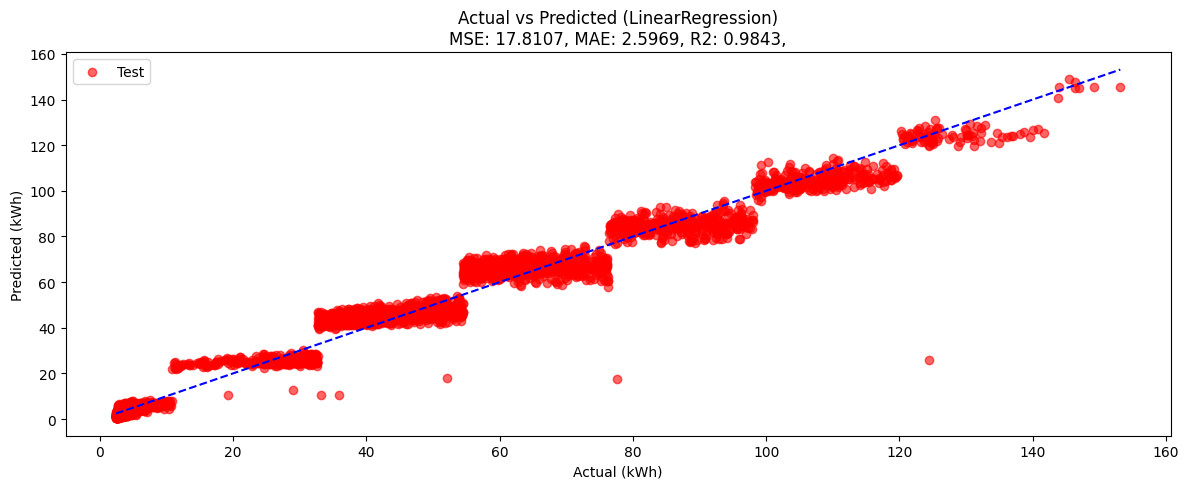

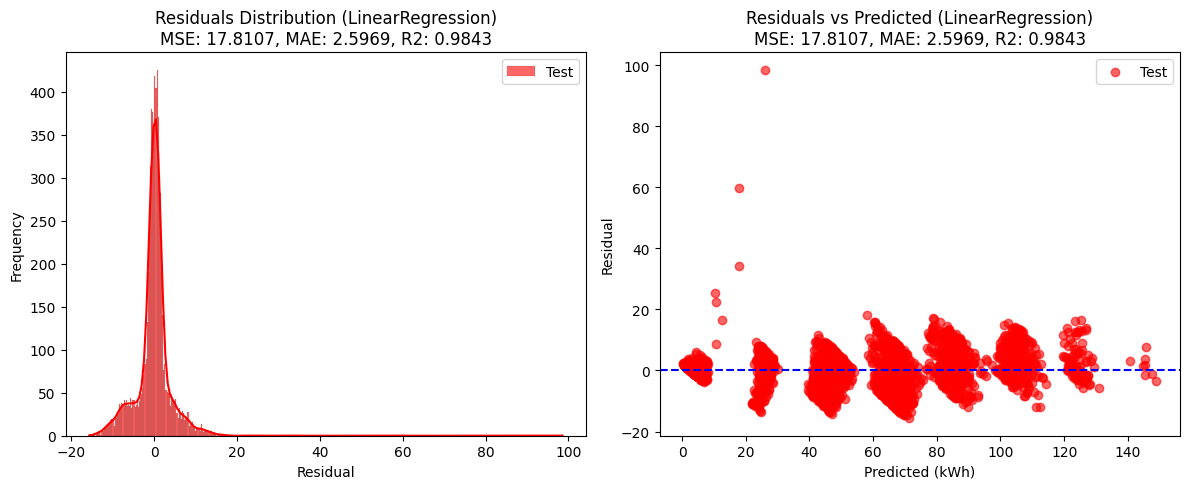


First 20 prediction of LinearRegression:
    Actual   Predicted
0     2.88    3.008829
1    60.77   70.112212
2   120.42  124.754216
3     3.13    3.062152
4    58.86   63.121094
5     3.10    3.645959
6     9.40    5.818040
7     3.60    4.526641
8     4.61    4.754464
9     3.78    4.246892
10    2.84    1.997980
11    3.02    2.152387
12    2.84    1.038455
13   64.84   70.831294
14    2.81    1.165408
15   87.05   85.918460
16    3.64    3.476229
17  111.20  105.263726
18   72.86   73.872357
19   37.80   41.372502

Chart for the model: Ridge


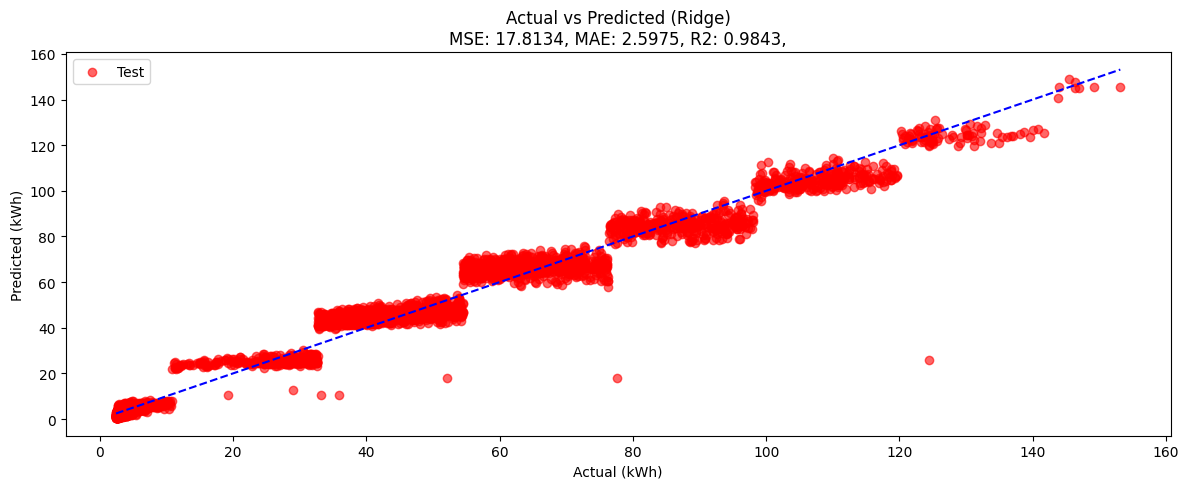

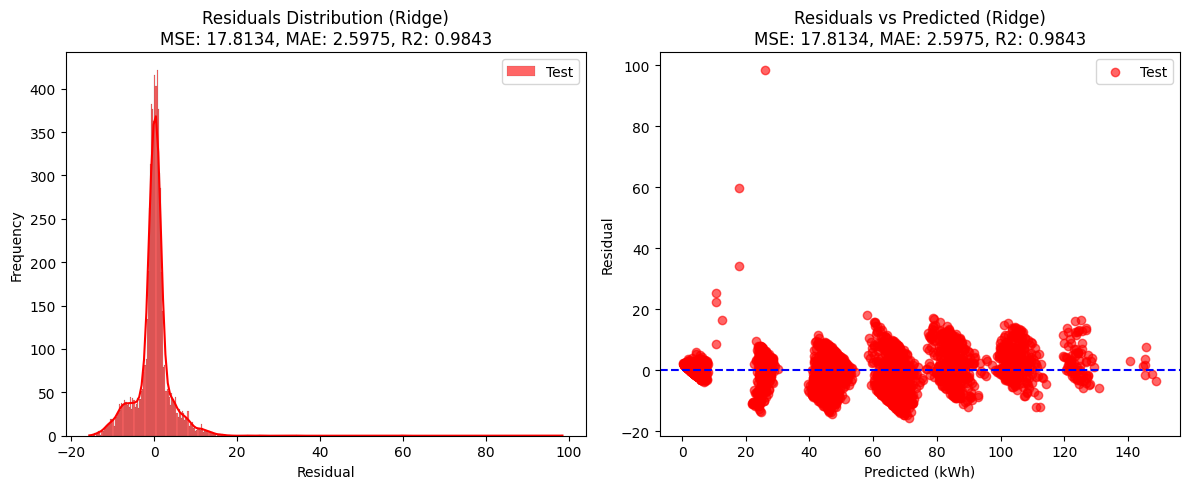


First 20 prediction of Ridge:
    Actual   Predicted
0     2.88    3.009235
1    60.77   70.115933
2   120.42  124.749175
3     3.13    3.061129
4    58.86   63.118150
5     3.10    3.646965
6     9.40    5.818737
7     3.60    4.528310
8     4.61    4.757368
9     3.78    4.248308
10    2.84    1.996808
11    3.02    2.151660
12    2.84    1.037189
13   64.84   70.835935
14    2.81    1.163845
15   87.05   85.916373
16    3.64    3.477450
17  111.20  105.260585
18   72.86   73.878995
19   37.80   41.369856

Chart for the model: Lasso


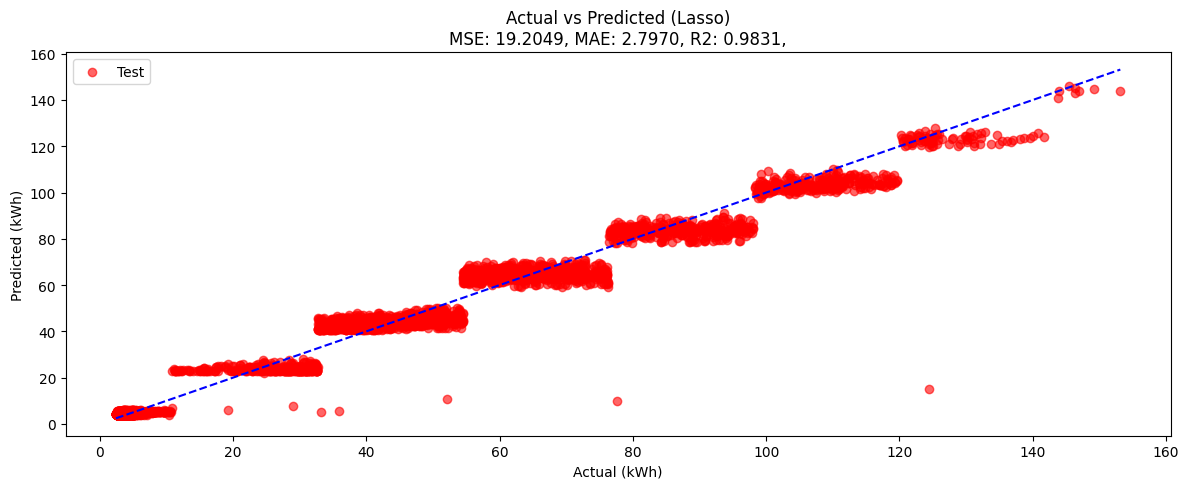

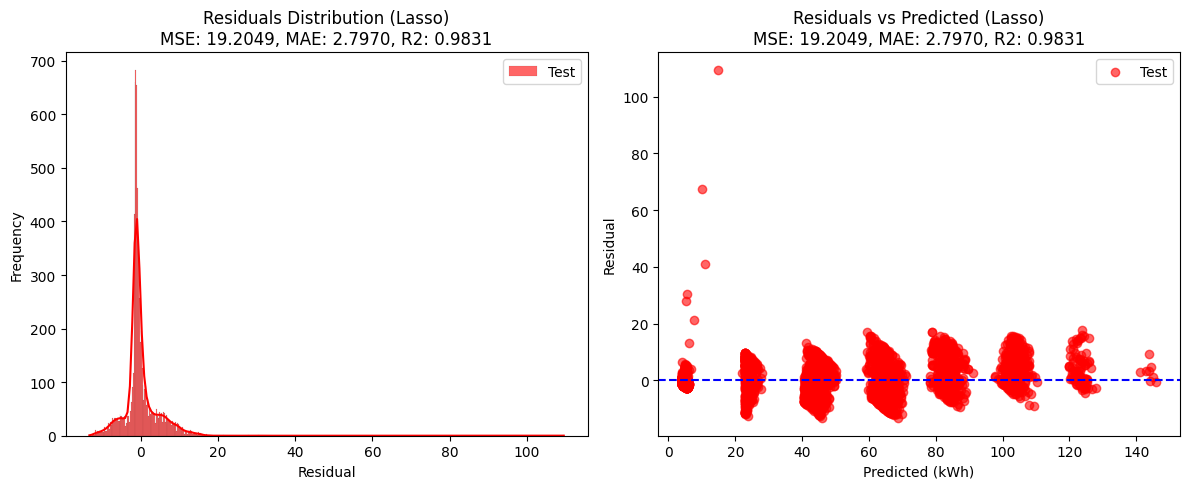


First 20 prediction of Lasso:
    Actual   Predicted
0     2.88    4.299453
1    60.77   67.825521
2   120.42  123.737711
3     3.13    4.003743
4    58.86   62.603297
5     3.10    4.306534
6     9.40    5.018264
7     3.60    4.358569
8     4.61    4.329088
9     3.78    4.359406
10    2.84    4.438152
11    3.02    4.464990
12    2.84    4.450035
13   64.84   68.494750
14    2.81    4.424149
15   87.05   83.530319
16    3.64    4.350809
17  111.20  104.496881
18   72.86   69.623628
19   37.80   41.092608

Chart for the model: KNN


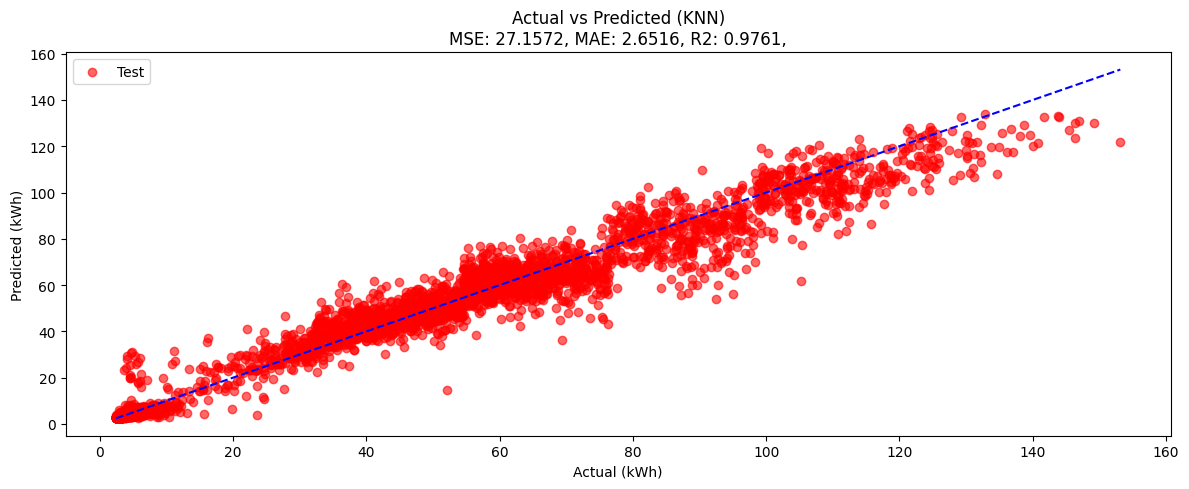

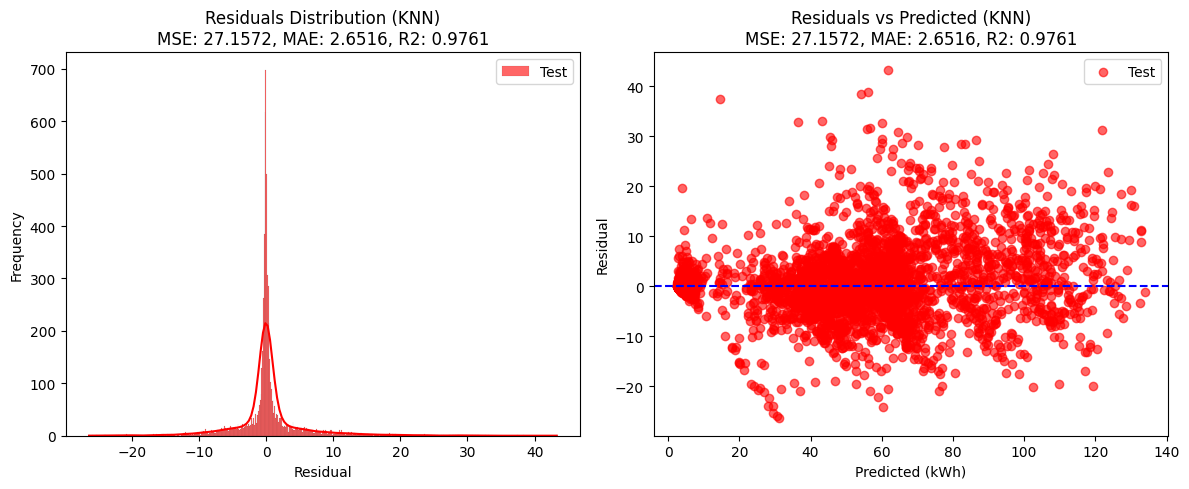


First 20 prediction of KNN:
    Actual  Predicted
0     2.88      2.784
1    60.77     61.140
2   120.42    116.576
3     3.13      3.120
4    58.86     55.276
5     3.10      3.594
6     9.40      6.518
7     3.60      3.644
8     4.61      4.470
9     3.78      3.730
10    2.84      2.772
11    3.02      3.102
12    2.84      3.104
13   64.84     66.988
14    2.81      2.814
15   87.05     96.610
16    3.64      3.316
17  111.20    103.688
18   72.86     66.952
19   37.80     37.204


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import time


def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)

    # Transform the date column from string to datetime
    data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

    # Extract the time properties of the previous date column into independent variables
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    data['minute'] = data['date'].dt.minute
    data['weekday'] = data['date'].dt.weekday

    # Delete the date column
    data = data.drop('date', axis=1).dropna()

    # Encode independent variables with text data into numeric data
    data = pd.get_dummies(data, columns=['WeekStatus', 'Day_of_week', 'Load_Type'])

    return data


def split_and_scale_data(data):
    X = data.drop(['Usage_kWh'], axis=1)  # Independent variables (features)
    y = data['Usage_kWh']  # Dependent variable (target)

    # Separate the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler


def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "KNN": KNeighborsRegressor()
    }

    results = {}

    for name, model in models.items():
        start_time = time.time()

        # Fit the model
        model.fit(X_train, y_train)

        end_time = time.time()
        elapsed_time = end_time - start_time

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred) 
        r2 = r2_score(y_test, y_pred)
         
        results[name] = {
            "MSE": mse,
            "MAE": mae,  
            "R2": r2,
            "Time": elapsed_time
        }

        print(f"{name}:")
        print(f"  MSE = {mse:.4f}")
        print(f"  MAE = {mae:.4f}")  
        print(f"  R2 = {r2:.4f}")
        print(f"  Time = {elapsed_time:.4f} seconds\n")

    return models, results



   # Visualize the actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred_test, model_name, mse, mae, r2):
    plt.figure(figsize=(12, 5))

    # Vẽ các điểm dự đoán của tập kiểm thử (màu đỏ)
    plt.scatter(y_test, y_pred_test, alpha=0.6, color='red', label='Test')

    # Reference diagonal 
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')

    plt.title(f'Actual vs Predicted ({model_name})\nMSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f},')
    plt.xlabel('Actual (kWh)')
    plt.ylabel('Predicted (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()


# Residuals Distribution Chart
def plot_residuals(y_test, y_pred_test, model_name, mse, mae, r2):
    residuals_test = y_test - y_pred_test

    plt.figure(figsize=(12, 5))

    # Residuals distribution plot of the test set
    plt.subplot(1, 2, 1)
    sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.6)
    plt.title(f'Residuals Distribution ({model_name})\nMSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.legend()

    # Residuals vs predicted plot for test set
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred_test, residuals_test, alpha=0.6, color='red', label='Test')
    plt.axhline(y=0, color='blue', linestyle='--')
    plt.title(f'Residuals vs Predicted ({model_name})\nMSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}')
    plt.xlabel('Predicted (kWh)')
    plt.ylabel('Residual')
    plt.legend()

    plt.tight_layout()
    plt.show()


def main():
    data = load_and_preprocess_data("C:\\Users\\ADMIN\\Dropbox\\PC\\Desktop\\NCKH\\Steel_industry_data.xls")
    X_train, X_test, y_train, y_test, scaler = split_and_scale_data(data)
    models, results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    for model_name, model in models.items():
        y_pred_test = model.predict(X_test)
        
        mse = results[model_name]["MSE"]
        mae = results[model_name]["MAE"]  
        r2 = results[model_name]["R2"]

        print(f"\nChart for the model: {model_name}")
        plot_actual_vs_predicted(y_test, y_pred_test, model_name, mse, mae, r2)
        plot_residuals(y_test, y_pred_test, model_name, mse, mae, r2)

        # Print the first 20 predictions
        print(f"\nFirst 20 prediction of {model_name}:")
        predictions_df = pd.DataFrame({'Actual': y_test.values[:20], 'Predicted': y_pred_test[:20]})
        print(predictions_df)

if __name__ == "__main__":
    main()